<a href="https://colab.research.google.com/github/cidraljunior/sklearn_transforms/blob/master/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Desafio Data Science

## Resumo:

Olá candidato, o objetivo deste desafio é testar os seus conhecimentos sobre a resolução de problemas de análise de dados e aplicação de modelos preditivos. Queremos testar seus conhecimentos dos conceitos estatísticos de modelos
preditivos, criatividade na resolução de problemas e aplicação de modelos básicos de machine learning. É importante deixar claro que não existe resposta certa e que o que nos interessa é sua capacidade de descrever e justificar os passos utilizados na resolução do problema.

## Descrição do Problema:

Seu objetivo é prever o churn (abandono de clientes) de um banco de dados fictício de uma instituição financeira. Para isso são fornecidos dois datasets : um dataset chamado Abandono_clientes composto por 10000 linhas e 13 colunas de informação ( features) , sendo uma coluna “Exited” composta por dados binários: 1 se o cliente abandonou o banco, 0 se não. O segundo dataset possui 1000 linhas e 12 colunas e não possui a coluna “Exited”. Seu objetivo é prever essa coluna a partir dos dados enviados e nos enviar para avaliação dos resultados.

## Atividades:
1. Descreva graficamente os dados disponíveis, apresentando as principais
estatísticas descritivas. Comente o por quê da escolha dessas estatísticas.
2. Explique como você faria a previsão do Churn a partir dos dados. Quais
variáveis e/ou suas transformações você utilizou e por quê? Qual tipo de
problema estamos resolvendo (regressão, classificação)? Qual modelo
melhor se aproxima dos dados e quais seus prós e contras? Qual medida de
performance do modelo foi escolhida e por quê?
3. Envie o resultado final do modelo em uma planilha com apenas duas colunas
(rowNumber, predictedValues) .

## Prazo de Entrega:
O prazo de entrega é de 1 semana.

# Resolução:

In [46]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

import utils

sns.set(style="ticks")

dfChurnTrain = pd.read_csv('Abandono_clientes.csv')
dfChurnTest = pd.read_csv('Abandono_teste.csv')


# Análise de evasão (churn) de clientes

O objetivo desse tipo de análise é responder a pergunta: "Quais dos nossos clientes atuais estão mais propensos a pararem de comprar nossos produtos ou serviços?", para que então um processo de mediação ou intervenção possa ser executado para retê-los. A importância desse tipo de análise se dá pelo fato do custo de adquirir um novo cliente é de uma ordem de magnitude maior, em termos de esforço, tempo e dinheiro, do que tentar manter aquele que você já conquistou.

Para guiar esse tipo de análise podem ser feitas as seguintes perguntas empresariais:

1. Quais são os clientes que não retornarão?
2. Quanto faturamento acabarei perdendo?
3. Como posso retê-los?
4. Quais é o padrão demográfico de meus clientes fiéis?

E valores empresariais esperados podem ser:

1. Empresas podem identificar as relaçoes entre clientes e produtos que não estão funcionando e apresentando grande evasão (churn). Assim, podem perceber melhor a qualidade dos produtos e o motivo para tal evasão (churn).
2. Com base no valor de vida útil (LTV) dos clientes, a empresa pode segmentar seu marketing para aumentar sua retenção.

## 1. Análise Exploratória dos Dados

Primeiro vamos explorar o dataset para entender melhor os padrões nos dados e formular hipóteses.

O dataset de ```abandono_clientes.csv``` é composto por 10000 linhas e 13 colunas, sendo 12 recursos (features) e 1 rotulo (label). Cada linha representa um cliente da instituição financeira. O dataset não apresenta dados faltantes (NaN).

As colunas ```RowNumber``` e ```CustomerId``` apresentam valores únicos e presumindo que não são series temporais serão ignorados

In [33]:
#@title 
print("Primeiras 5 linhas do dataset:")
dfChurnTrain.head()



Primeiras 5 linhas do dataset:


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
#@title 
print('Quantidade de valores nulos(NaN):')
dfChurnTrain.isnull().sum()

Quantidade de valores nulos(NaN):


RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [4]:
#@title 
print('Valores únicos na coluna "CustomerId": ', len(dfChurnTrain['CustomerId'].unique()))
print('Valores únicos na coluna "RowNumber": ', len(dfChurnTrain['RowNumber'].unique()))

Valores únicos na coluna "CustomerId":  10000
Valores únicos na coluna "RowNumber":  10000


### 1.1 Variáveis Individuais

Para começar vamos olhar as distribuições das variáveis de forma individual.

**A. Demografia** - Gênero, Idade, Localização

* Distribuição de Gênero - 55% dos clientes são do sexo masculino.

* Distribuição de Idade - 43% dos clientes estão na faixa etária de 30 a 40 anos.

* Distribuição da localização - Metade dos clientes estão localizados na França, um quarto na Espanha e um quarto na Alemanha.

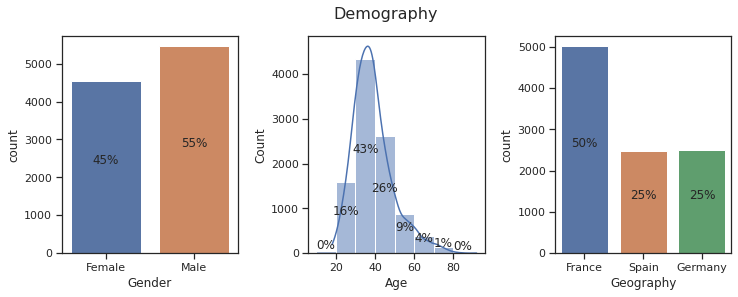

In [34]:
#@title 
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
fig.subplots_adjust(hspace = 0.3, wspace = 0.4)

ax = sns.countplot(x ='Gender', data=dfChurnTrain, ax = axes[0])
utils.addPercentOnBars(ax)

ax = sns.histplot(dfChurnTrain['Age'], bins = range(10, 100, 10), kde = True, ax = axes[1])
utils.addPercentOnBars(ax)

ax = sns.countplot(x ='Geography', data=dfChurnTrain)
utils.addPercentOnBars(ax)

fig.suptitle("Demography", fontsize = 16);

**B. Financeiro** - Pontuação de Crédito, Saldo, Salário Estimado, Cartão de Crédito

* Distribuição da Pontuação de Crédito - 38% dos clientes tem uma pontuação com valores entre 600-700.

* Distribuição do Saldo - 36 % dos clientes tem um saldo igual a zero (possível outlier).

* Distribuição do Salário Estimado - Segue uma distribuição uniforme.

* Distribuição do Cartão de Crédito - 71% dos clientes tem cartão de crédito.

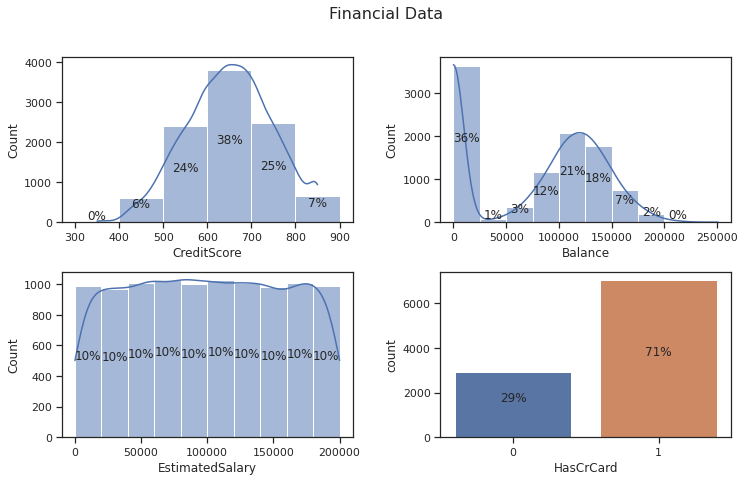

In [15]:
#@title 
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 7))
fig.subplots_adjust(hspace = 0.3, wspace = 0.3)

ax = sns.histplot(dfChurnTrain['CreditScore'], bins = range(300, 1000, 100), kde = True, ax = axes[0,0])
utils.addPercentOnBars(ax)

ax = sns.histplot(dfChurnTrain['Balance'], bins = range(0, 250000, 25000), kde = True, ax = axes[0,1])
utils.addPercentOnBars(ax)

ax = sns.histplot(dfChurnTrain['EstimatedSalary'], bins = 10 , kde = True, ax = axes[1,0])
utils.addPercentOnBars(ax)

ax = sns.countplot(x ='HasCrCard', data=dfChurnTrain, ax = axes[1,1])
utils.addPercentOnBars(ax)

fig.suptitle("Financial Data", fontsize = 16);


**C. Serviços** - Tempo de Serviço, Número de Produtos, Membro Ativo

* Distribuição do Tempo de Serviço - Cada faixa de tempo de serviço tem aproximadamente 10 % dos clientes.

* Distribuição do Número de Produtos - A maioria dos clientes tem 1 ou 2 produtos.

* Distribuição de Membros Ativos - Aproximadamente metade dos clientes são ativos.

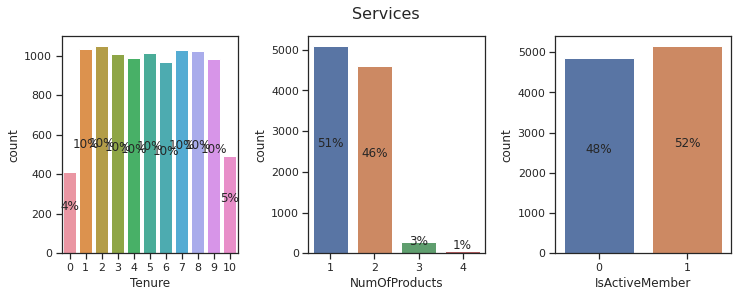

In [35]:
#@title 
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
fig.subplots_adjust(hspace = 0.3, wspace = 0.4)

ax = sns.countplot(x = 'Tenure', data = dfChurnTrain, ax = axes[0])
utils.addPercentOnBars(ax)

ax = sns.countplot(x = 'NumOfProducts', data = dfChurnTrain, ax = axes[1])
utils.addPercentOnBars(ax)

ax = sns.countplot(x = 'IsActiveMember', data = dfChurnTrain, ax = axes[2])
utils.addPercentOnBars(ax)

fig.suptitle("Services", fontsize = 16);

### 1.2 Taxa de Abandono 

A coluna ```Exited``` mostra se o cliente abandonou o serviço, sendo  1 se o cliente abandonou o banco, 0 se não. Como essa coluna é o alvo da predição serão avaliados as variaveis sobre ela. Assim é possível calcular a taxa de abandono para o dataset. Aproximadamente 20% dos clientes abandonaram o serviço. Esse número indica que o dataset dispõe de dados desequilibrados.

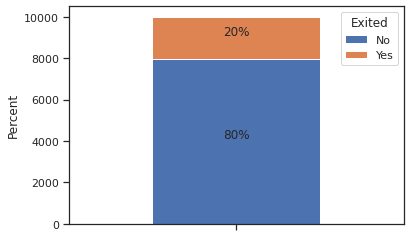

In [36]:
#@title 
#ax = sns.countplot('Exited', data=dfChurnTrain)
#ax.set_ylabel('')
#addPercentOnBars(ax,'middle')

ax = pd.crosstab('', dfChurnTrain['Exited']).apply(lambda r: r/r.sum()*10000, axis = 1)
ax = ax.plot.bar(stacked = True, rot = 0)
ax.legend(['No','Yes'],title="Exited")
ax.set_ylabel('Percent')
ax.set_xlabel('')
utils.addPercentOnBars(ax)

#### 1.2.1 Taxa de abandono por variáveis categóricas

As variáveis categóricas serão avaliadas sobre o alvo ```Existed``` para verificar se segue a mesma proporção do dataset geral. Diferenças sobre essas proporções(geral e categória) podem indicar que tal categória apresenta uma tendência.

* A taxa de abandono entre o grupo de mulheres é 9% maior que do o grupo de homens
* A Alemanha tem uma taxa de abandono aproximadamente duas vezes maior do que a da França e a da Espanha.

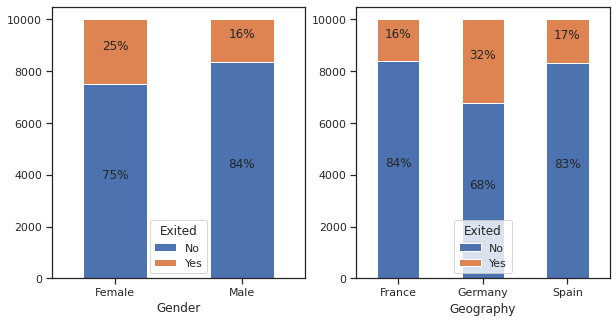

In [37]:
#@title 
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

ax = pd.crosstab(dfChurnTrain['Gender'], dfChurnTrain['Exited']).apply(lambda r: r/r.sum()*10000, axis = 1)
ax_1 = ax.plot.bar(stacked = True, rot = 0, ax = axes[0])
ax_1.legend(['No','Yes'],loc='lower center',title="Exited")
utils.addPercentOnBars(ax_1)
  
ax = pd.crosstab(dfChurnTrain['Geography'], dfChurnTrain['Exited']).apply(lambda r: r/r.sum()*10000, axis = 1)
ax_2 = ax.plot.bar(stacked = True, rot = 0, ax = axes[1])
ax_2.legend(['No','Yes'],loc='lower center',title="Exited")
utils.addPercentOnBars(ax_2)

* A taxa de abandono considerando os clientes possuem ou não cartão de credito não difere muito da taxa de abandono geral.
* Clientes que não são ativos tem uma taxa de abandono maior.

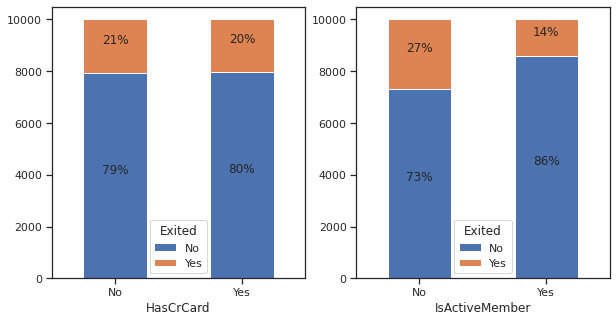

In [38]:
#@title 
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

ax = pd.crosstab(dfChurnTrain['HasCrCard'], dfChurnTrain['Exited']).apply(lambda r: r/r.sum()*10000, axis = 1)
ax.index = pd.Index(['No','Yes'], name = ax.index.name )
ax_1 = ax.plot.bar(stacked = True, rot = 0, ax = axes[0])
ax_1.legend(['No','Yes'],loc='lower center',title="Exited")
utils.addPercentOnBars(ax_1)

ax = pd.crosstab(dfChurnTrain['IsActiveMember'], dfChurnTrain['Exited']).apply(lambda r: r/r.sum()*10000, axis = 1)
ax.index = pd.Index(['No','Yes'], name = ax.index.name )
ax_2 = ax.plot.bar(stacked = True, rot = 0, ax = axes[1])
ax_2.legend(['No','Yes'],loc='lower center',title="Exited")
utils.addPercentOnBars(ax_2)

* Clientes com 3 ou 4 produtos tem altas taxas de abandono.

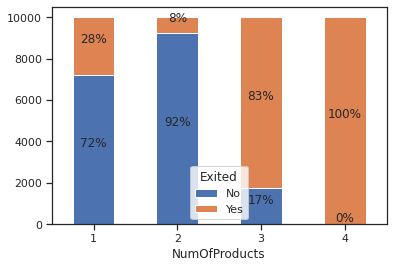

In [39]:
#@title 
ax = pd.crosstab(dfChurnTrain['NumOfProducts'], dfChurnTrain['Exited']).apply(lambda r: r/r.sum()*10000, axis = 1)
#ax.index = pd.Index(['No','Yes'], name = ax.index.name )
ax_2 = ax.plot.bar(stacked = True, rot = 0)
ax_2.legend(['No','Yes'],loc='lower center',title="Exited")
utils.addPercentOnBars(ax_2)

#### 1.2.2 Taxa de Abandono por Variáveis Contínuas

As variáveis contínuas serão avaliadas sobre o alvo ```Existed``` para verificar se segue a mesma proporção do dataset geral.

Será usado um diagrama de caixa (Box Plot) para avaliar a localização, dispersão, assimetria, comprimento da cauda e outliers. E um grafico com a proporção dos histogramas de abandono e não abandono para visualizar como a taxa de abandono vária pela variavel contínua.

* ```CreditScore``` apresenta uma taxa de abandono aproximadamente constante para a maioria das faixas de valores, somente para valores abaixo de 400 apresenta uma alta taxa de abandono. Porém nota-se que os valores nessa faixa estão enquadrados como outliers. Como esses outliers não são nulos, indicando valores reais, eles não serão ignorados.

* A taxa de abandono vária com as faixas de idade (```Age```), sendo taxas menores entre a faixa 20-40 anos, e altas taxas entre 40-70 anos. Os dados apresentam outliers.

* O tempo de serviço (```Tenure```) apresenta taxas de abandono uniforme pelas faixas de periodos.

* Altos valores de ```Balance``` apresentam altas taxas de abandono.

* ```EstimatedSalary``` apresenta taxas de abandono uniforme.


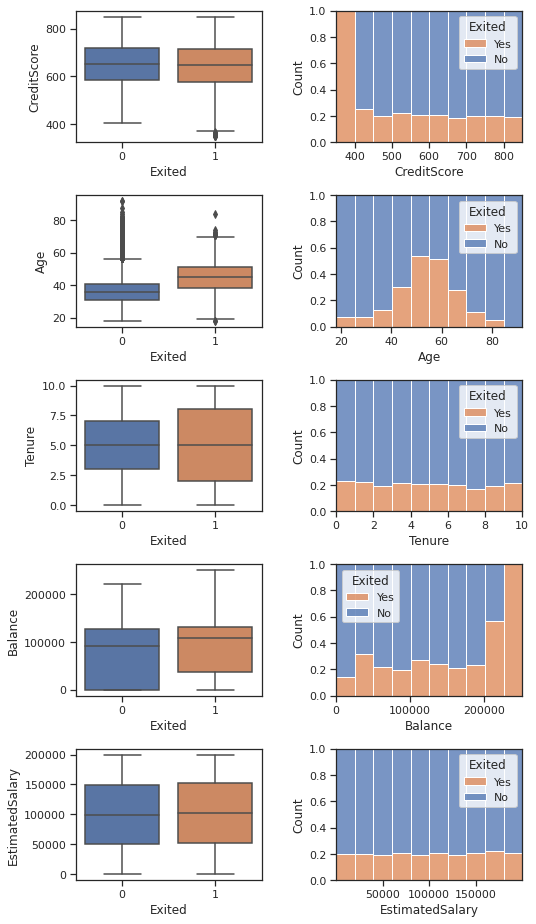

In [27]:
#@title 

numColumns = ['CreditScore','Age','Tenure','Balance','EstimatedSalary']

fig = plt.figure(figsize = (8, 16))
fig.subplots_adjust(hspace = 0.4, wspace = 0.4)

for column in numColumns:
    ax = fig.add_subplot(5,2,numColumns.index(column)*2+1)
    sns.boxplot(x = 'Exited', y = column, data = dfChurnTrain, ax = ax)
    ax = fig.add_subplot(5,2,numColumns.index(column)*2+2)
    sns.histplot(data = dfChurnTrain, x = column, hue = 'Exited', bins = 10,  multiple = 'fill', ax = ax)
    ax.legend(['Yes','No'],title="Exited")


## 2. Modelo

Será utilizada técnicas de análise de dados preditiva para fazer previsão de abandono de clientes, na qual os dados serão utilizados para desenvolver modelos. Devido a natureza do problema, estamos tentando prever entre duas possibilidades para cada cliente, sendo se ele abandonou ou não o banco. Assim o tipo de problema que estamos resolvendo é de classificação binária.

Será empregado quatro métodos populares de classificação (regressão logística, árvores de decisão, máquinas de vetores de suporte e redes neurais artificiais). Os resultados obtidos a partir de todos os tipos de modelos serão comparados uns aos outros usando métodos de avaliação classificatória de modelos (precisão, sensibilidade, especificidade).

Como os dados que queremos prever estão desequilibrados, isto é a variavél "Exited" contém 80% dos registros como "Não", os modelos serão treinados com dados originais desequilibrados e com dados equilibrados. Estudos mostram que dispor de dados tão desequilibrados pode exercer um efeito negativo no modelo preditivo.


### 2.1 Correlação entre as variáveis contínuas 

Para evitar a redundância entre variáveis é verificado se existe correlação entre elas.

* As variáveis contínuas não apresentam correlação entre si, sendo assim não há a necessidade de eliminar variáveis.

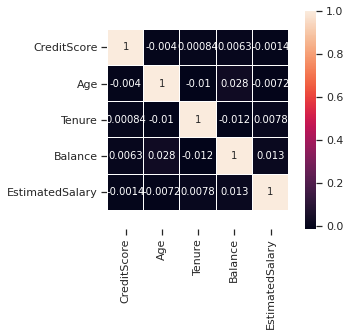

In [40]:
#@title 
ax = sns.heatmap(dfChurnTrain[numColumns].corr(), linewidths=0.1, vmax=1.0, square=True, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5);

### 2.2 Seleção, Preparação e Divisão do Dataset

Foram selecionadas as colunas númericas ```['CreditScore','Age','Tenure','Balance','EstimatedSalary']``` e as catégoricas ```['Geography','Gender','NumOfProducts','HasCrCard','IsActiveMember']```.As colunas catégoricas com mais de duas opções foram trasformadas em colunas boleanas através do ```get_dummies```. Após os dados foram padronizados pelo ```StandardScaler```. Alguns modelos tem resultado superior com dados padronizados.

Foi utilizado a técnica de over sampling com o SMOTE para equilibrar os dados.

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
#Feature Selection

numColumns = ['CreditScore','Age','Tenure','Balance','EstimatedSalary']

catColumns = ['Geography','Gender','NumOfProducts','HasCrCard','IsActiveMember']

dummy_cols = ['Geography','NumOfProducts', 'Gender']

target = ['Exited']

dataset = pd.get_dummies(dfChurnTrain[numColumns + catColumns + target], columns = dummy_cols)

scaler = StandardScaler()

X = dataset.drop(target, axis = 1)
X = scaler.fit_transform(X)
y = dataset[target].to_numpy()

oversample = SMOTE()
X_over, y_over = oversample.fit_resample(X, y)

# Split Train - Test
# Dados desequilibrados 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 5)

# Dados equilibrados
X_train_over, X_test_over, y_train_over, y_test_over = train_test_split(X_over, y_over, test_size=0.3, random_state = 5)


### 2.3 Seleção de Modelos

Será testado os modelos de regressão logística, árvores de decisão, floresta aleatória, xgboost, máquinas de vetores de suporte e redes neurais artificiais. Os modelos serão avaliando pelas métricas de especificidade (TN / (TN + FP)) e sensibilidade (TP / (TP + FN)) com valor de threshold variavél. Em um modelo de Churn é desejável que a especificidade e sensibilidade estejam no seu máximo, porêm há conflito de escolha entre essas variavéis. Assim será calculada a média geometrica entre a especificidade e sensibilidade afim de encontrar o seu valor máximo dado um threshold.

Os modelos passaram pela validação cruzada (k-fold) com 5 divisões.



In [71]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve

# models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

def my_score(y_true, y_pred):
    fpr, tpr, thresholds = roc_curve(y_true, y_pred)
    return np.sqrt(tpr * (1-fpr)).max()

def test_model(model,X,y):

    kf = KFold(n_splits=5, shuffle=True, random_state = 8)

    plt.figure()

    gmeans_ls = []

    for train_index, test_index in kf.split(X):

        name = split_text(str(model),"(")

        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        model.fit(X_train, y_train)

        preds = model.predict_proba(X_test)[:,1]

        fpr, tpr, thresholds = roc_curve(y_test, preds)

        accuracu_scores = []

        accuracy_scores = []
        for thresh in thresholds:
            accuracy_scores.append(accuracy_score(y_test, [1 if m > thresh else 0 for m in preds]))

        accuracies = np.array(accuracy_scores)

        sns.lineplot(x = thresholds, y = accuracies, color = 'green', alpha = 0.25)
        sns.lineplot(x = thresholds, y = tpr, color = 'blue', alpha = 0.25)
        sns.lineplot(x = thresholds, y = 1 - fpr, color = 'red', alpha = 0.25)

        plt.legend(['Accuracy','Sensitivity','Specificity'])
        plt.title(name)

        gmeans_ls.append(my_score(y_test, preds))
    
    plt.grid()
    plt.xlim(0,1)
    plt.show()

    return np.round(np.mean(gmeans_ls), 3)

models = [LogisticRegression(),
          CalibratedClassifierCV(LinearSVC()),
          DecisionTreeClassifier(),
          RandomForestClassifier(),
          XGBClassifier(),
          MLPClassifier(hidden_layer_sizes=(16, 3))]

Testando e avaliando os modelos usando **dados desequilibrados**

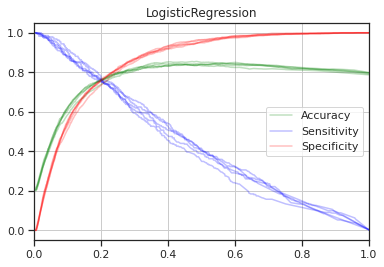

LogisticRegression G-Means Sensitivity & Specificity max:  0.764 



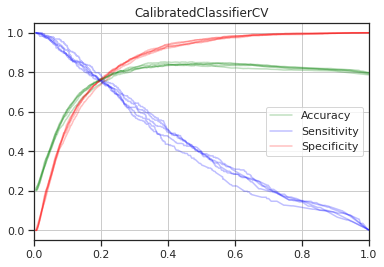

CalibratedClassifierCV G-Means Sensitivity & Specificity max:  0.766 



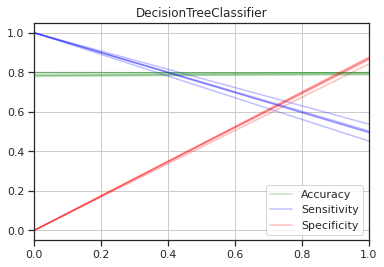

DecisionTreeClassifier G-Means Sensitivity & Specificity max:  0.655 



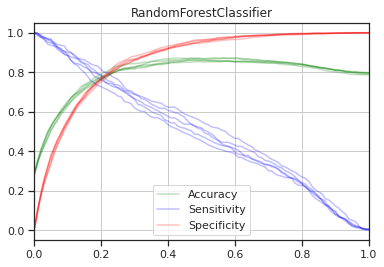

RandomForestClassifier G-Means Sensitivity & Specificity max:  0.777 



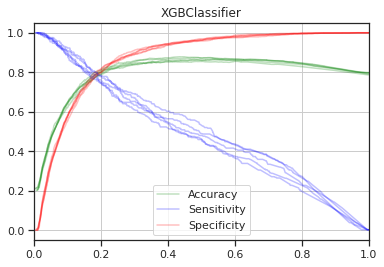

XGBClassifier G-Means Sensitivity & Specificity max:  0.792 



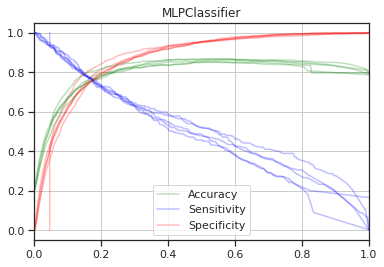

MLPClassifier G-Means Sensitivity & Specificity max:  0.773 



In [72]:
for model in models:
  name = split_text(str(model),"(")
  print(name, "G-Means Sensitivity & Specificity max: ", test_model(model, X_train, y_train), "\n")

Testando e avaliando os modelos usando **dados equilibrados**

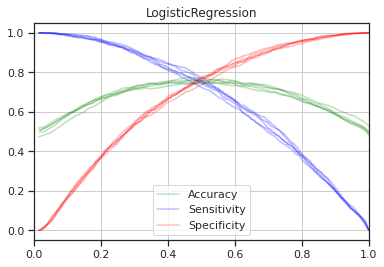

LogisticRegression G-Means Sensitivity & Specificity max:  0.758 



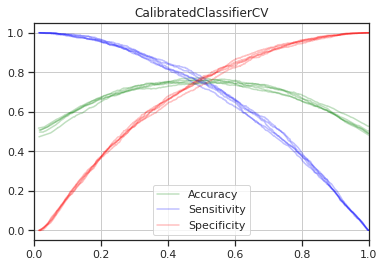

CalibratedClassifierCV G-Means Sensitivity & Specificity max:  0.759 



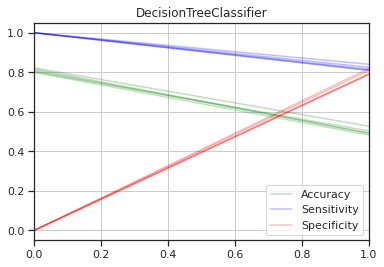

DecisionTreeClassifier G-Means Sensitivity & Specificity max:  0.81 



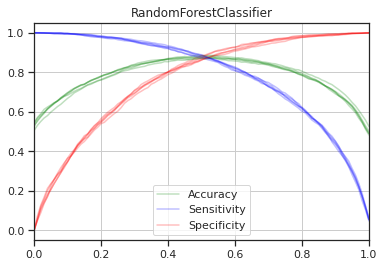

RandomForestClassifier G-Means Sensitivity & Specificity max:  0.878 



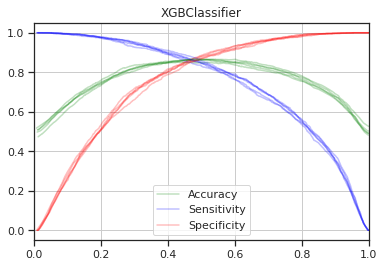

XGBClassifier G-Means Sensitivity & Specificity max:  0.863 



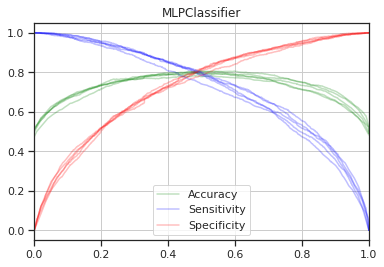

MLPClassifier G-Means Sensitivity & Specificity max:  0.797 



In [73]:
for model in models:
  name = split_text(str(model),"(")
  print(name, "G-Means Sensitivity & Specificity max: ", test_model(model,X_train_over,y_train_over), "\n")

O modelo com o melhor resultado foi o **RandomForestClassifier() com dados equilibrados.**


#### 2.4 Melhorando o Modelo

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer
from scipy import stats

param_dist = {
              'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)],
              'max_features': ['auto', 'sqrt'],
              'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)] + [None],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'bootstrap': [True, False]
             }

model = RandomForestClassifier()

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

search = RandomizedSearchCV(model, 
                         param_distributions = param_dist,
                         cv = kfold,  
                         n_iter = 100, 
                         scoring = make_scorer(my_score, greater_is_better = True),
                         error_score = 0, 
                         verbose = 3, 
                         n_jobs = -1)

search.fit(X_train_over, y_train_over)
print("Melhores Parâmetros (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  6.0min


Best Threshold=0.172485, G-Mean=0.782
              precision    recall  f1-score   support

           0       0.94      0.77      0.85      2403
           1       0.46      0.79      0.58       597

    accuracy                           0.78      3000
   macro avg       0.70      0.78      0.72      3000
weighted avg       0.84      0.78      0.79      3000



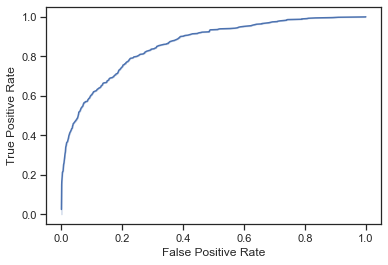

In [ ]:
from sklearn.metrics import classification_report

test_predictions = search.predict(X_test)
test_predictions_prob = search.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, test_predictions_prob)

sns.lineplot(x = fpr, y = tpr)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

fpr, tpr, thresholds = roc_curve(y_test, test_predictions_prob)
gmeans = np.sqrt(tpr * (1-fpr))
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

print(classification_report(y_test, [1 if m > thresholds[ix] else 0 for m in test_predictions_prob]))

Best Threshold=0.440000, G-Mean=0.922
              precision    recall  f1-score   support

           0       0.97      0.94      0.96      2403
           1       0.79      0.89      0.84       597

    accuracy                           0.93      3000
   macro avg       0.88      0.92      0.90      3000
weighted avg       0.94      0.93      0.93      3000



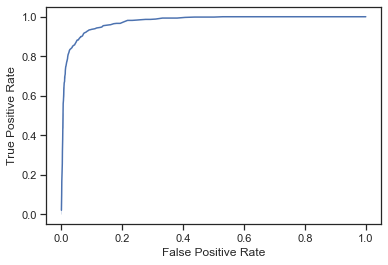

In [ ]:
from sklearn.metrics import classification_report

search = RandomForestClassifier(n_estimators= 100)
search.fit(X_train_over, y_train_over)


test_predictions = search.predict(X_test)
test_predictions_prob = search.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, test_predictions_prob)

sns.lineplot(x = fpr, y = tpr)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

fpr, tpr, thresholds = roc_curve(y_test, test_predictions_prob)
gmeans = np.sqrt(tpr * (1-fpr))
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

print(classification_report(y_test, [1 if m > .5 else 0 for m in test_predictions_prob]))

Best Threshold=0.382253, G-Mean=0.926
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      2403
           1       0.80      0.89      0.85       597

    accuracy                           0.94      3000
   macro avg       0.89      0.92      0.90      3000
weighted avg       0.94      0.94      0.94      3000



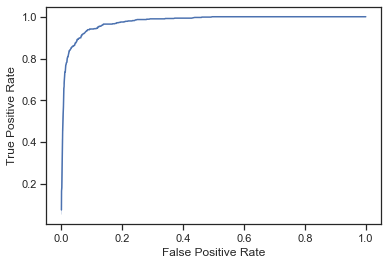

In [ ]:
from sklearn.metrics import classification_report

search = RandomForestClassifier(n_estimators= 879)
search.fit(X_train_over, y_train_over)


test_predictions = search.predict(X_test)
test_predictions_prob = search.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, test_predictions_prob)

sns.lineplot(x = fpr, y = tpr)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

fpr, tpr, thresholds = roc_curve(y_test, test_predictions_prob)
gmeans = np.sqrt(tpr * (1-fpr))
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

print(classification_report(y_test, [1 if m > .5 else 0 for m in test_predictions_prob]))